# Численное решение интегральных уравнений Фредгольма 2-го рода

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

$$
y(x)- \int_{a}^{x} K(x,s,y(s)) \,ds = f(x)
$$

In [2]:
K =  lambda x, s: 1 + x*s*0 #ядро
f = lambda x: np.sin(x) - x/2 + np.sin(2*x)/4 #правая часть
y_sol = lambda x: np.sin(x) #решение
a = 0
b = np.pi/2
h = np.pi/2 / 14

In [3]:
def quad_trapezoid(a,b,h,K,f):
    N = int((b - a)/h)
    x = np.linspace(a,b, N+1)
    y = np.empty_like(x)
    y[0] = f(x[0])
    K_ii = K(x[0], x[0])
    for i in range(1,N+1):
        c_i = f(x[i]) + sum(h*K(x[i],x[j])*y[j]*y[j] for j in range(0,i))
        y[i] = (1 - np.sqrt(1-2*h*K_ii*c_i)) / (h*K_ii)
    return x, y

In [4]:
def runge_romberg(method,p,h):
    x_h, y_h = method(a,b,h,K,f)
    x_2h, y_2h = method(a,b,2*h,K,f)
    N = len(x_2h)
    R = max(abs((y_h[2*i] - y_2h[i])) / (2**p - 1) for i in range(N))
    print("Error via Runge-Romberg = ",R)

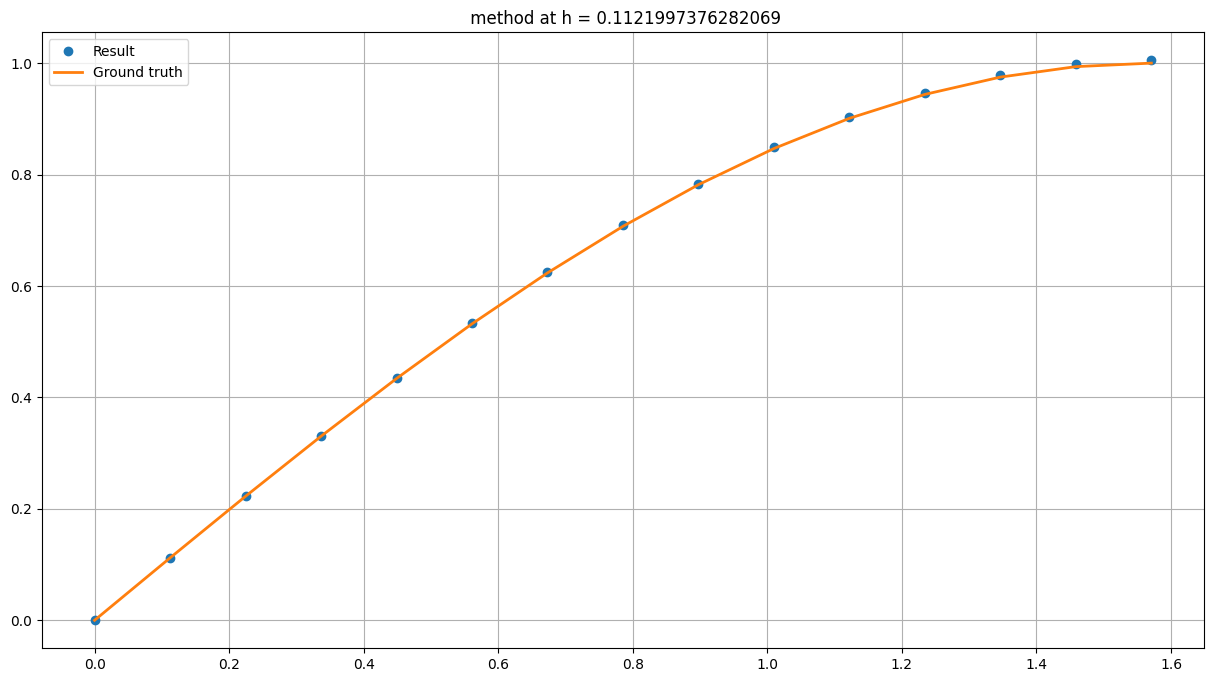

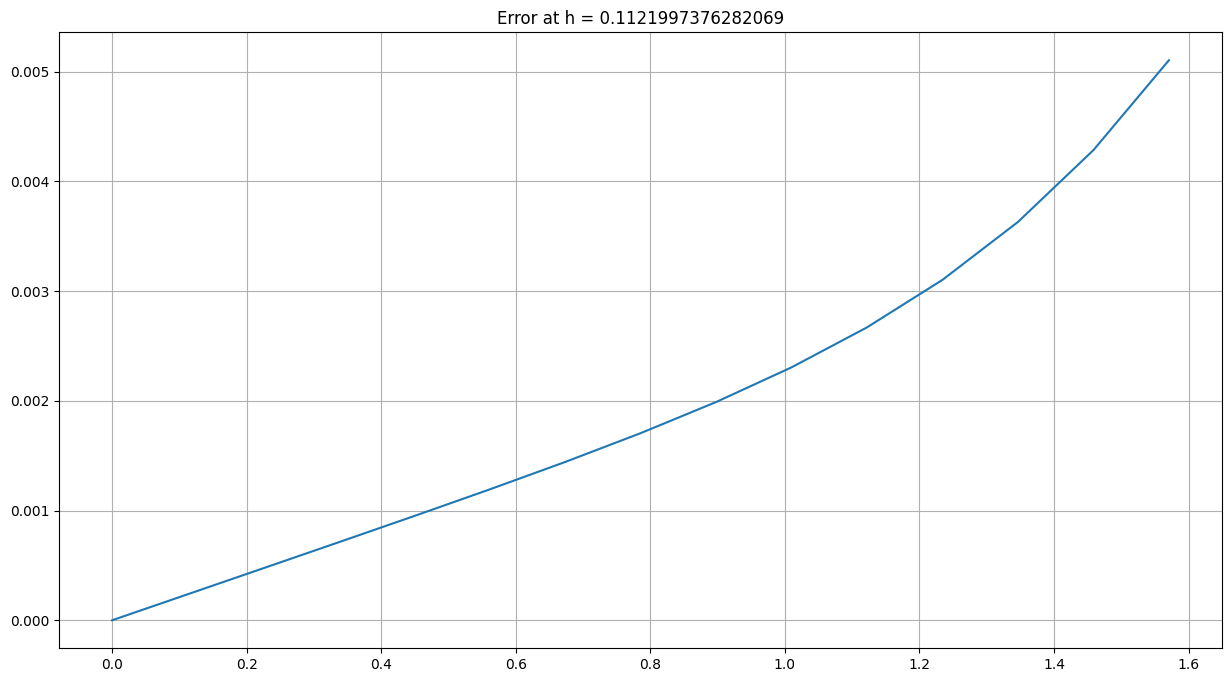

Error =  0.005103604601522482
Error via Runge-Romberg =  0.005460017799608104


In [5]:
x, y = quad_trapezoid(a,b,h,K,f)
plt.plot(x, y, 'o', label='Result')
plt.plot(x, y_sol(x), '-', lw=2, label='Ground truth')
plt.legend(loc='best')
plt.grid(True)
plt.title(' method at h = %s' %(h))
plt.show()

plt.grid(True)
plt.title('Error at h = %s' %h)
plt.plot(x,abs(y - y_sol(x)), '-')
plt.show()
print("Error = ",max(abs(y - y_sol(x))))

runge_romberg(quad_trapezoid,2,h)

# Метод Ньютона-Кантаровича
Интегральное уравнение Фредгольма 2-го рода выглядит так:
$$
y(x)-\int_{a}^{b} K(x,s,y(s)) \,ds = f(x)
$$
Применяем этот метод для решения такого рода уравнений:
$$
\begin{cases}
y_k(x) = y_{k-1}(x) + \phi_{k-1}(x) \\
\phi_{k-1}(x) = \epsilon_{k-1}(x) + \int_{a}^{b}K_y^{'}(x,s,y_{k-1}(s)) \phi_{k-1}(s) \,ds \\
\epsilon_{k-1}(x) = f(x) - y_{k-1}(x) +\int_{a}^{b} K(x,s,y_{k-1}(s)) \,ds
\end{cases}
$$
У нас есть
$$
\phi_{k-1}(x) = f(x) - y_{k-1}(x) +\int_{a}^{b} K(x,s,y_{k-1}(s)) \,ds + \int_{a}^{b}K_y^{'}(x,s,y_{k-1}(s)) \phi_{k-1}(s) \,ds
$$
Теперь мы аппроксимируем два интеграла в правой части одной из формул численного интегрирования (Симпсона, трапеций или Гаусса), получаем
$$
\phi_{k-1}(x) = f(x) - y_{k-1}(x) +\sum_{j=0}^{n} A_{j}K(x,x_j,y_{k-1}(x_j))  + \sum_{j=0}^{n} A_j K_y^{'}(x,x_j,y_{k-1}(x_j)) \phi_{k-1}(x_j)
$$
Заменяем $x=x_i$  for $i=0,1,...,n$, получаем следующую систему:
$$
\phi_{k-1}(x_i) = f(x_i) - y_{k-1}(x_i) +\sum_{j=0}^{n} A_{j}K(x_i,x_j,y_{k-1}(x_j))  + \sum_{j=0}^{n}A_j K_y^{'}(x_i,x_j,y_{k-1}(x_j)) \phi_{k-1}(x_j)  
$$
Так как $y_k(x) - y_{k-1}(x) = \phi_{k-1}(x)$, имеем
$$
y_k(x_i) - y_{k-1}(x_i) = f(x_i) - y_{k-1}(x_i) +\sum_{j=0}^{n} A_{j}K(x_i,x_j,y_{k-1}(x_j))  + \sum_{j=0}^{n}A_j K_y^{'}(x_i,x_j,y_{k-1}(x_j)) [y_k(x_j) - y_{k-1}(x_j)]
$$
И получаем
$$
y_k(x_i) = f(x_i)  +\sum_{j=0}^{n} A_{j}K(x_i,x_j,y_{k-1}(x_j))  + \sum_{j=0}^{n}A_j K_y^{'}(x_i,x_j,y_{k-1}(x_j)) [y_k(x_j) - y_{k-1}(x_j)]
$$
Пусть
$$
(F^{(k-1)})_{i+1} = f(x_i) + \sum_{j=0}^{n} A_{j} [K(x_i,x_j,y_{k-1}(x_j)) - K_y^{'}(x_i,x_j,y_{k-1}(x_j))y_{k-1}(x_j)] \\
(A^{(k-1)})_{i+1,j+1} = A_j K_y^{'}(x_i,x_j,y_{k-1}(x_j)) \\
(Y^{(k)})_{i+1} = y_k(x_i)
$$
полученная система - СЛАУ, решаем любым методом:
$$
(I-A^{k-1})Y^k = F^{(k-1)}, \quad k = 1,2,3,...
$$
Инициализация $(Y^{(0)})_{i} = y_0(x_i)$

In [6]:
K =  lambda x, s, y: np.cos(np.pi*x) * np.sin(np.pi*s) * y**3 / 5 #ядро
K_y =  lambda x, s, y: np.cos(np.pi*x)*np.sin(np.pi*s)* y*y * 3 / 5 #ядро производная
f = lambda x: np.sin(np.pi*x)  #правая часть
y_sol = lambda x: np.sin(np.pi*x) + np.cos(np.pi*x)*(20 - np.sqrt(391)) / 3 #решение
a = 0
b = 1
h = 0.05
m = 2

In [7]:
def runge_romberg2(method,p,h): # m > 1
    x_h, y_h = method(K,K_y,f,a,b,h,m)
    x_2h, y_2h = method(K,K_y,f,a,b,2*h,m)
    N = len(x_2h)
    R = max(abs((y_h[2*i] - y_2h[i])) / (2**p - 1) for i in range(N))
    print("Error via Runge-Romberg = ",R)

In [8]:
def newton_fred(K,K_y,f,a,b,h,m):
    k = 0
    N = int((b - a)/h)
    x = np.linspace(a,b, N+1)
    I = np.eye(N+1)
    Y = np.ones_like(x) # initial solution
    F = np.empty_like(Y)
    A = np.empty((N+1,N+1))
    while k < m:
        for i in range(N+1):
            F[i] = f(x[i]) + sum(h*(K(x[i],x[j],Y[j]) - K_y(x[i],x[j],Y[j])*Y[j]) for j in range(1,N)) + h/2*(K(x[i],x[0],Y[0])+K(x[i],x[N],Y[N])- K_y(x[i],x[0],Y[0])*Y[0]- K_y(x[i],x[N],Y[N])*Y[N])
        for i in range(N+1):
            A[i,0] = K_y(x[i],x[0],Y[0])*h/2
            A[i,N] = K_y(x[i],x[N],Y[N])*h/2
            for j in range(1,N):
                A[i,j] = K_y(x[i],x[j],Y[j])*h
        Y = np.linalg.solve(I-A,F)
        k += 1
    return x, Y

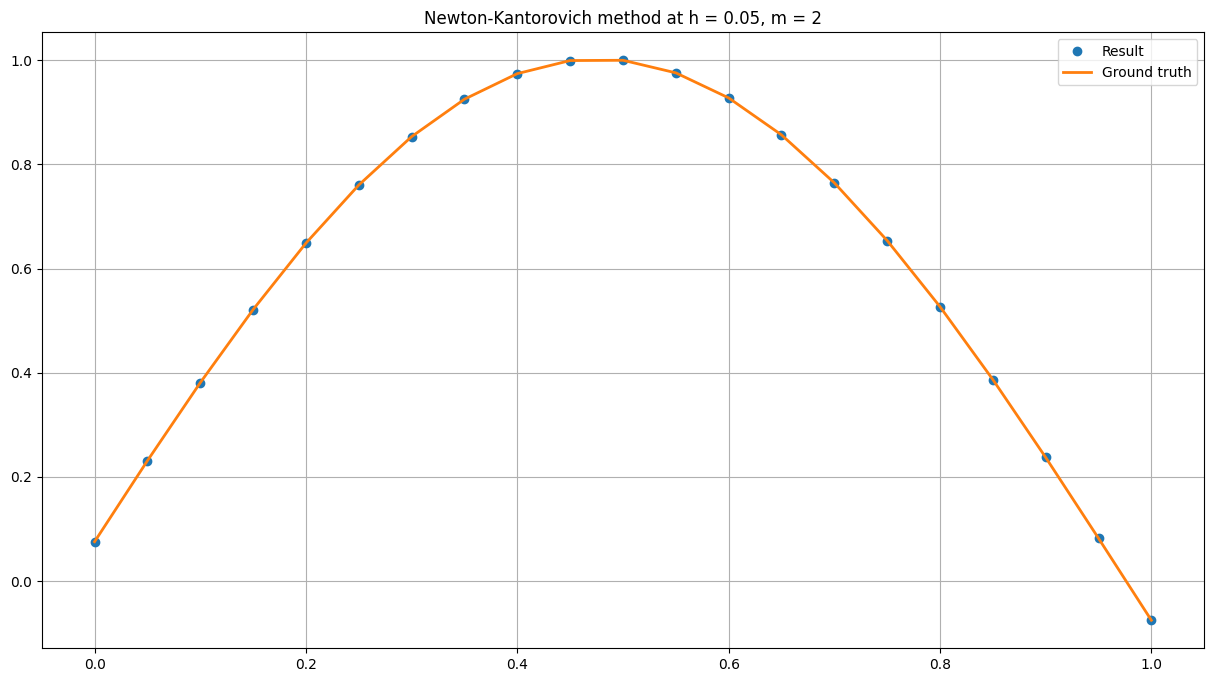

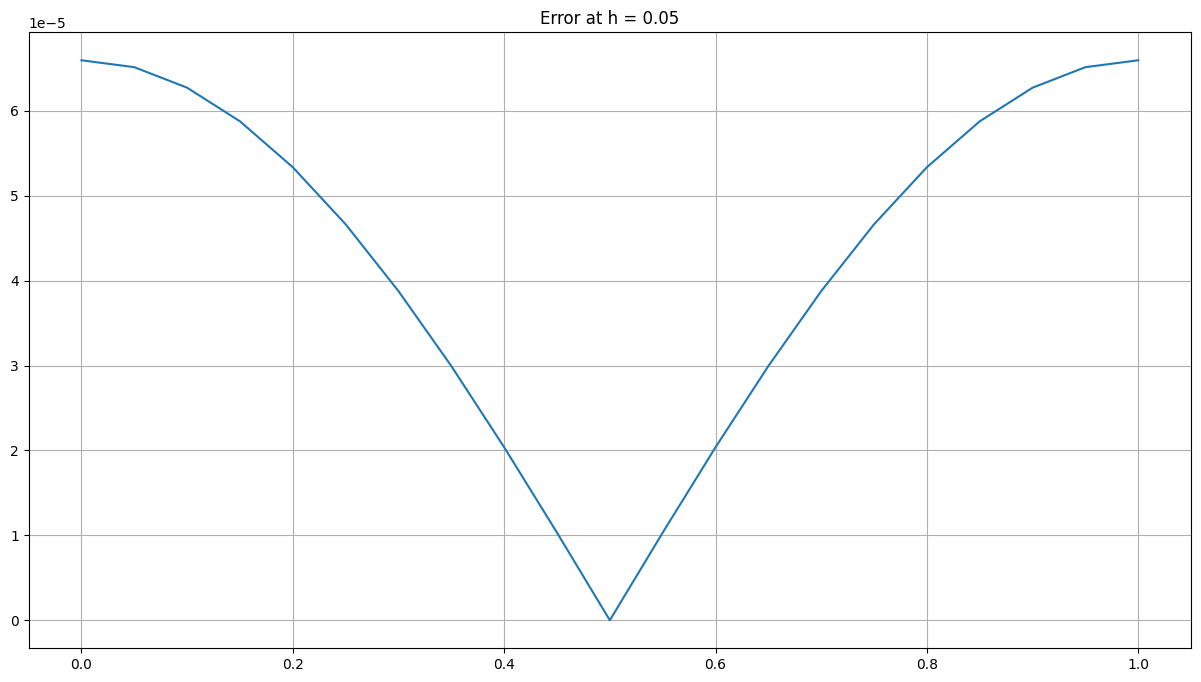

Error =  6.594747096845543e-05
Error via Runge-Romberg =  2.274757913224105e-06


In [9]:
x, y = newton_fred(K,K_y,f,a,b,h,m)
plt.plot(x, y, 'o', label='Result')
plt.plot(x, y_sol(x), '-', lw=2, label='Ground truth')
plt.legend(loc='best')
plt.grid(True)
plt.title('Newton-Kantorovich method at h = %s, m = %s' %(h,m))
plt.show()

plt.grid(True)
plt.title('Error at h = %s' %h)
plt.plot(x,abs(y - y_sol(x)), '-')
plt.show()
print("Error = ",max(abs(y - y_sol(x))))

runge_romberg2(newton_fred,2,h)

##Метод квадратур с формулой трапеции

$$
y(x)-\int_{a}^{b} K(x,s,y(s)) \,ds = f(x)
$$

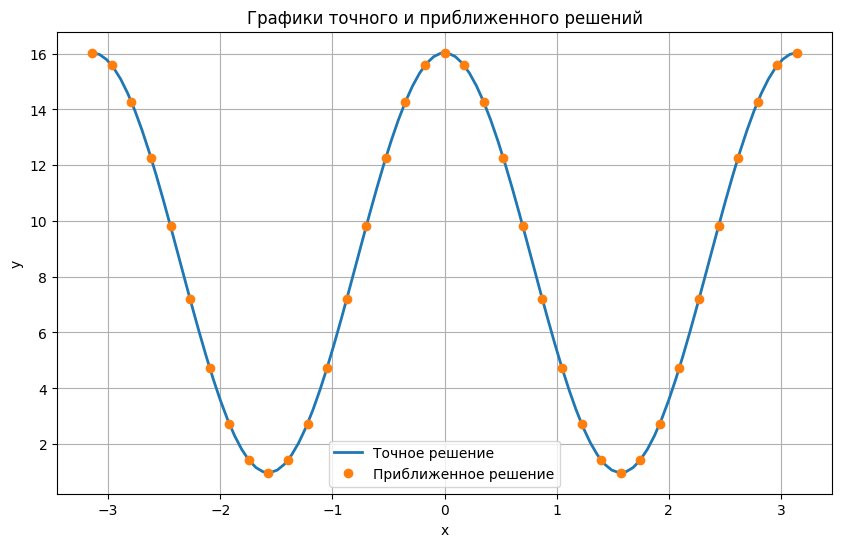

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def Fred_II_Rect(K, f, a, b, h):
    x = np.arange(a, b + h, h)
    n = len(x)
    wt = 1 / 2
    wj = 1
    A = np.zeros((n, n))

    for i in range(n):
        A[i, 0] = -h * wt * K(x[i], x[0])
        for j in range(1, n - 1):
            A[i, j] = -h * wj * K(x[i], x[j])
        A[i, n - 1] = -h * wt * K(x[i], x[n - 1])
        A[i, i] += 1

    B = np.zeros((n, 1))
    for j in range(n):
        B[j, 0] = f(x[j])

    y = np.linalg.solve(A, B)
    return y.flatten(), x

# Определение функций K, f и точного решения y_exact
def K(x1, s):
    return 1 / (0.64 * (np.cos((x1 + s) / 2))**2 - 1) * (3 / (10 * np.pi))

def f(x1):
    return 25 - 16 * (np.sin(x1))**2

def y_exact(x1):
    return 17 / 2 + 128 / 17 * np.cos(2 * x1)

# Вычисление приближенного решения
h = np.pi / 18
a = -np.pi
b = np.pi
y_approx, x_vals = Fred_II_Rect(K, f, a, b, h)

# Построение графиков
plt.figure(figsize=(10, 6))

# График точного решения
x_exact = np.linspace(a, b, 100)
plt.plot(x_exact, y_exact(x_exact), label='Точное решение', linewidth=2)

# График приближенного решения
plt.plot(x_vals, y_approx, 'o', label='Приближенное решение')

plt.title('Графики точного и приближенного решений')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
